# 1. Buisiness understanding

In [1]:
# I- Customer retention and Customer churn:
# Customer retention is critical to business strategy in the telecommunications industry as companies strive to maintain a stable and loyal customer base. Customer churn, the process by which customers stop using a company's services and switch to a competitor, poses a significant threat to profitability and market share. 
# High churn rates can lead to increased costs associated with acquiring new customers and a loss of revenue from existing 
# customers. In such a competitive environment, where the cost of acquiring new customers often exceeds the cost of retaining existing ones, telecom companies must prioritize strategies that minimize churn and enhance customer loyalty.

# II- Why using machine learning:
# Machine learning has emerged as a powerful tool in the fight against customer churn in the telecommunications industry.
# One of the key advantages of using machine learning for churn prediction is its ability to process and analyze vast amounts of data in real-time.

# III- Our task:
# Leveraging predictive analytics by developing a machine learning model that forecasts customer churn within the telecommunications industry. By accurately predicting which customers are likely to churn, decision-makers will gain valuable insights to proactively address customer retention, improve service offerings, and drive strategic decisions that enhance customer satisfaction and loyalty.

# 2. Data understanding

## Importing Libraries

In [2]:
#pip install --upgrade imbalanced-learn
#!pip show imbalanced-learn
#!pip show scikit-learn
#!pip uninstall imbalanced-learn scikit-learn
#!pip install imbalanced-learn scikit-learn
#!pip install cupy-cuda112

In [151]:
import pandas as pd     # Data preprocessiong operations
import inspect
import numpy as np     # Linear algebra operations
import csv     # CSV file operations 
import matplotlib.pyplot as plt     # Visualizations 
import seaborn as sns     # Visualizations 
import scipy.stats as stats 
from sklearn.preprocessing import LabelEncoder     # Encoding ordinal features
from sklearn.preprocessing import OneHotEncoder     # Encoding nominal features
from sklearn.feature_selection import SelectKBest, chi2     # Feature selection fun  ctions
from sklearn.preprocessing import StandardScaler     # Standrization
from sklearn.linear_model import LogisticRegression     # Logistic Regression model
from sklearn.ensemble import RandomForestClassifier, StackingClassifier     # Random forest model and StackingClassifier lib
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score    # Model evaluation metrics
from sklearn.model_selection import GridSearchCV     # Model hyperparameters grid
import optuna     # Hyperparameters fine-tuning
import logging     # Customizing fetch messages
from imblearn.over_sampling import SMOTE     # Handle dataset imbalance 
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import warnings
import xgboost as xgb
import lightgbm as lgb

##  Importing Dataset

#### This is the dataset Kaggle link: https://www.kaggle.com/datasets/mnassrib/telecom-churn-datasets

In [4]:
training_dataset = pd.read_csv("training_dataset.csv")
test_dataset = pd.read_csv("test_dataset.csv")

# 2.1. Data Overview

In [5]:
training_dataset.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [6]:
test_dataset.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [7]:
def overView(df):
    '''
    Overview of the dataset
    
    df_name :     Dataframe name
    '''
    # get the name of the dataset
    frame = inspect.currentframe().f_back
    df_name = [name for name, val in frame.f_locals.items() if val is df][0]
    print(f"{df_name}")
    print(f"\nShape: {df.shape}")
    print(f"\nFeatures:")
    print(f"\n{df.columns.tolist()}")
    print(f"\nNumber of duplicated rows: {df.duplicated().sum()}")
    print(f"\nMissing values: {df.isna().sum().sum()}")
    print(f"\nUnique values:")
    print(f"\n{df.nunique()}")

In [8]:
overView(training_dataset)

training_dataset

Shape: (2666, 20)

Features:

['State', 'Account length', 'Area code', 'International plan', 'Voice mail plan', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls', 'Churn']

Number of duplicated rows: 0

Missing values: 0

Unique values:

State                       51
Account length             205
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       42
Total day minutes         1489
Total day calls            115
Total day charge          1489
Total eve minutes         1442
Total eve calls            120
Total eve charge          1301
Total night minutes       1444
Total night calls          118
Total night charge         885
Total intl minutes         158

In [9]:
overView(test_dataset)

test_dataset

Shape: (667, 20)

Features:

['State', 'Account length', 'Area code', 'International plan', 'Voice mail plan', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls', 'Churn']

Number of duplicated rows: 0

Missing values: 0

Unique values:

State                      51
Account length            179
Area code                   3
International plan          2
Voice mail plan             2
Number vmail messages      37
Total day minutes         562
Total day calls           100
Total day charge          562
Total eve minutes         557
Total eve calls            94
Total eve charge          528
Total night minutes       568
Total night calls          96
Total night charge        453
Total intl minutes        132
Total intl calls    

# 2.2. Data Exploration

## 2.2.1. Univariate Analysis

In [10]:
def customerChurn(dfs):
    
    # Set up the subplots
    fig, axes = plt.subplots(1, 2, figsize=(14, 7))
    
    for i, df in enumerate(dfs):
        churn_counts = df['Churn'].value_counts(normalize=True) * 100

        # Define colors and explode effect for each slice
        colors = sns.color_palette('pastel')
        explode = [0.05] * len(churn_counts)

        # Create pie chart with enhancements
        axes[i].pie(
            churn_counts,
            labels=churn_counts.index,
            autopct='%1.1f%%',
            startangle=90,
            colors=colors,
            explode=explode,
            wedgeprops={'edgecolor': 'black', 'linewidth': 1}
        )
        
        # Get the name of the dataset
        frame = inspect.currentframe().f_back
        df_name = [name for name, val in frame.f_locals.items() if val is df][0]
        title = df_name + ' Churn Percentage Distribution'
        
        # Set title and legend for each subplot
        axes[i].set_title(title, fontsize=16, fontweight='bold')
        axes[i].legend(title="Churn Status", loc="upper right", bbox_to_anchor=(1.2, 1))
        
    plt.tight_layout()
    plt.show()

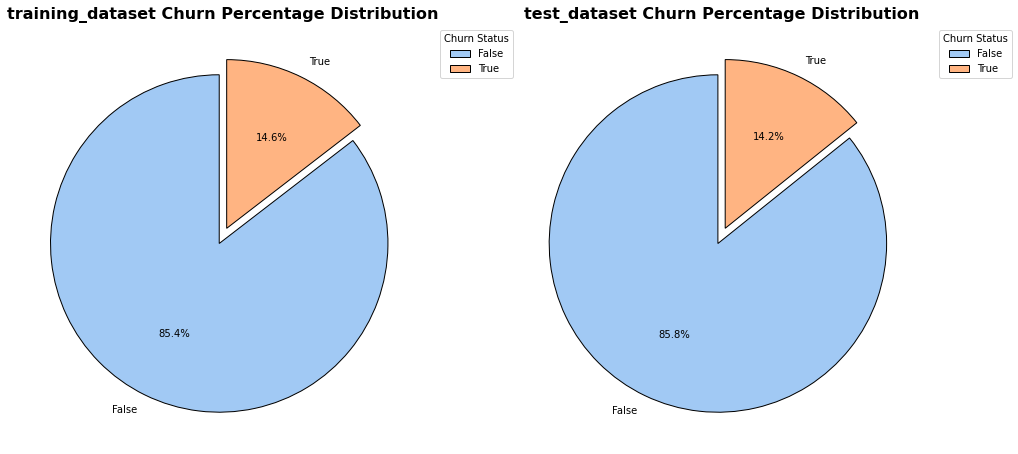

In [11]:
customerChurn([training_dataset, test_dataset])

In [12]:
def plot_histograms(df, columns=None, bins=10):
    '''
    Plots histograms of specified columns from a DataFrame in subplots.
    
    df :           The DataFrame containing the data
    columns :      List of column names to plot
    bins :         Number of bins for the histograms
    ncols :        Number of columns
    nrows :        Number of rows per feature
    df_name :      Dataframe name
    title :        Visualization title
    '''
    
    if columns is None:
        columns = df.select_dtypes(include=['number']).columns

    num_columns = len(columns)
    ncols = 4  # 4 plots per row
    nrows = (num_columns + ncols - 1) // ncols  # Calculate required rows
    
    fig, axes = plt.subplots(nrows, ncols, figsize=(5 * ncols, 4 * nrows))
    axes = axes.flatten()  # Flatten axes array for easy iteration

    for i, column in enumerate(columns):
        axes[i].hist(df[column].dropna(), bins=bins, color='skyblue', edgecolor='black')
        axes[i].set_title(f'Distribution of {column}', fontsize=14)
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Frequency')

    
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)
    
    # Get the name of the dataset
    frame = inspect.currentframe().f_back
    df_name = [name for name, val in frame.f_locals.items() if val is df][0]
    title = df_name + ' Data Distribution'
    print(f"{title}")
    
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    
    plt.show()


In [13]:
def check_outliers(df):
    '''
    Plots box plots to check for outliers
    
    df :                       Dataframe name
    numerical_columns :        numerical columns in the DataFrame
    num_plots :                Number of box plots
    num_rows :                 Number of rows for a single box plot
    df_name :                  Dataframe name
    title :                    Visualization title
    
    '''
    
    numerical_columns = df.select_dtypes(include=[np.number]).columns
    num_plots = len(numerical_columns)
    num_rows = (num_plots // 4) + (1 if num_plots % 4 else 0)
    
    plt.figure(figsize=(16, num_rows * 4))
    
    for i, column in enumerate(numerical_columns):
        plt.subplot(num_rows, 4, i + 1)
        sns.boxplot(x=df[column])
        plt.title(f'Boxplot for {column}')
        
    # Get the name of the dataset
    frame = inspect.currentframe().f_back
    df_name = [name for name, val in frame.f_locals.items() if val is df][0]
    title = df_name + ' Boxplots'
    print(f"{title}")
    
    plt.tight_layout()
    plt.show()

In [14]:
#plot_histograms(training_dataset)

In [15]:
#check_outliers(training_dataset)

In [16]:
#plot_histograms(test_dataset)

In [17]:
#check_outliers(test_dataset)

## 2.2.2. Bivariate Analysis

In [18]:
def pairplots(df):
    '''
    Plots the relation between each pair of features (to visulize distribution)
    
    df :       The DataFrame
    out_cols :      Excluded columns (Categorical)
    viz_cols :      Columns to be included in the pairplot
    df_name :  Dataframe name
    title :    Plot title
    '''
    
    out_cols = list(set(df.nunique()[df.nunique()<6].keys().tolist()
                        + df.select_dtypes(include='object').columns.tolist()))
    viz_cols = [x for x in df.columns if x not in out_cols] + ['Churn']

    sns.pairplot(df[viz_cols], diag_kind="kde")
    
    # Get the name of the dataset
    frame = inspect.currentframe().f_back
    df_name = [name for name, val in frame.f_locals.items() if val is df][0]
    title = df_name + ' Pair plots'
    
    plt.show()

In [19]:
#pairplots(training_dataset)

In [20]:
#pairplots(test_dataset)

## 2.2.3. Multivariate Analysis

In [21]:
def plot_correlation_matrix(df):
    '''
    Plots a correlation matrix heatmap

    df :       The DataFrame
    df_name :  Dataframe name
    title :    Plot title
    '''
    corr_matrix = df.corr()

    # Create a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        corr_matrix, 
        annot=True, 
        fmt=".2f", 
        cmap="coolwarm", 
        vmin=-1, 
        vmax=1, 
        square=True,
        cbar_kws={"shrink": .8},
        linewidths=0.5,
        linecolor="black"
    )
    # Get the name of the dataset
    frame = inspect.currentframe().f_back
    df_name = [name for name, val in frame.f_locals.items() if val is df][0]
    title = df_name + ' Correlation Matrix'
    
    plt.title(title, fontsize=16, fontweight='bold')
    plt.show()

In [22]:
#plot_correlation_matrix(training_dataset)

In [23]:
#plot_correlation_matrix(test_dataset)

In [24]:
# Some features are highly correlated => We need to remove some of them
# (Total day minutes and Total day charge)
# (Total eve minutes and Total eve charge)
# (Total night minutes and Total night charge)
# (Total intl minutes and Total intl charge)

# 3. Data prepatation

In [25]:
# In these datasets we don't have any missing value so we can handle outliers than apply encoding for categorical features

## 3.1. Handeling outliers

In [26]:
def compute_bounds(df, column):
    '''
    Helper function that calculates the bounds of a column
    
    df :               Dataframe name
    Q1 :               First quantile
    Q3 :               Third quantile
    IQR :              Quantile range
    lower_bound :      Floor of values
    upper_bound :      Ceil of values
    '''
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return lower_bound, upper_bound

In [27]:
def Replace_outliers_with_mean(df, column):
    '''
    Checks for outliers in a column and replaces them with the mean value
    
    df :               Dataframe name
    column:            Column name
    mean_value :       Mean value of the column
    '''
    
    lower_bound, upper_bound = compute_bounds(df, column)
    
    mean_value = df[column].mean()
    
    df[column] = df[column].where((df[column] >= lower_bound) & (df[column] <= upper_bound), mean_value)
    
    return df

In [28]:
def Replace_outliers_with_median(df, column):
    '''
    Checks for outliers in a column and replaces them with the median value
    
    df :               Dataframe name
    column:            Column name
    mean_value :       Median value of the column
    '''
    
    lower_bound, upper_bound = compute_bounds(df, column)
    
    median_value = df[column].median()
    
    df[column] = df[column].where((df[column] >= lower_bound) & (df[column] <= upper_bound), median_value)
    
    return df

In [29]:
# def Replace_outliers_with_mode(df, column):
#     '''
#     Checks for outliers in a column and replaces them with the mode value
    
#     mean_value :       Mode value of the column
#     '''
    
#     lower_bound, upper_bound = compute_bounds(df, column)
    
#     mode_value = df[column].mode()
    
#     df[column] = df[column].where((df[column] >= lower_bound) & (df[column] <= upper_bound), mode_value)
    
#     return df

In [30]:
# Replace the outliers of the specified columns using the adequat operation
#  features outliers => Median
# Continuous features outliers => Mean
# Binary features outliers => Mode

In [31]:
# training_dataset_mode_columns = []
replace_outliers_with_mean_columns = ['Total day minutes', 
                                 'Total day charge', 
                                 'Total eve minutes', 
                                 'Total eve charge', 
                                 'Total night minutes', 
                                 'Total night charge', 
                                 'Total intl minutes', 
                                 'Total intl charge']

replace_outliers_with_median_columns = ['Account length',
                                   'Total day calls',
                                   'Total eve calls',
                                   'Total night calls',
                                   'Total intl calls',
                                   'Customer service calls']

In [32]:
def handle_outliers(df, median_cols, mean_cols):
    '''
    Changes outliers in the dataset using the adequat function
    
    df :                  Dataframe name
    median_cols :         Columns to replace their outliers with median
    mean_cols :           Columns to replace their outliers with mean
    '''
    for i in range(2): 
        for column in mean_cols:
            df = Replace_outliers_with_mean(df, column)
            print(f"mean value after iteration {i+1} of {column} : {df[column].mean()}")
        for column in median_cols:
            df = Replace_outliers_with_median(df, column)
            print(f"median value after iteration {i+1} of {column} : {df[column].mean()}")
    
    # Deleting rows with very large outliers        
    numeric_columns = df.select_dtypes(include=['number']).columns
    for column in numeric_columns:
        lower_bound, upper_bound = compute_bounds(df, column)
        # Identify and drop rows with outliers
        outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
        df = df[~outliers]
    
    check_outliers(df)

mean value after iteration 1 of Total day minutes : 179.80439385915508
mean value after iteration 1 of Total day charge : 30.567273252577998
mean value after iteration 1 of Total eve minutes : 200.58322006889574
mean value after iteration 1 of Total eve charge : 17.04982454024985
mean value after iteration 1 of Total night minutes : 201.01283448206473
mean value after iteration 1 of Total night charge : 9.045667354573089
mean value after iteration 1 of Total intl minutes : 10.288510804557847
mean value after iteration 1 of Total intl charge : 2.7761888953108462
median value after iteration 1 of Account length : 100.08327081770443
median value after iteration 1 of Total day calls : 100.47674418604652
median value after iteration 1 of Total eve calls : 100.11140285071268
median value after iteration 1 of Total night calls : 99.96549137284322
median value after iteration 1 of Total intl calls : 4.250562640660165
median value after iteration 1 of Customer service calls : 1.2809452363090772

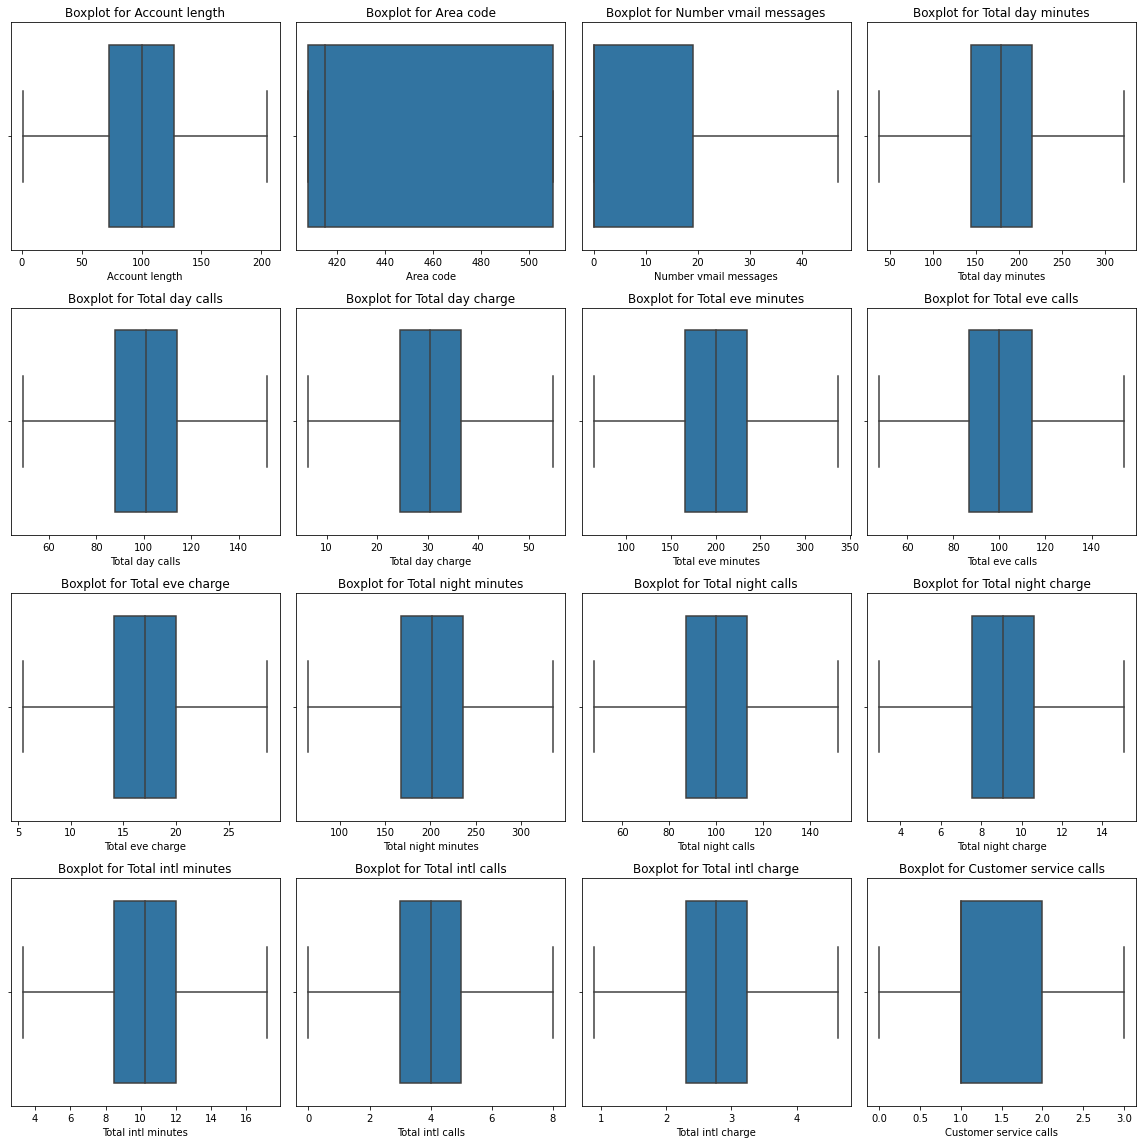

In [33]:
handle_outliers(training_dataset, replace_outliers_with_median_columns, replace_outliers_with_mean_columns)

mean value after iteration 1 of Total day minutes : 180.72285513914713
mean value after iteration 1 of Total day charge : 30.723486217910523
mean value after iteration 1 of Total eve minutes : 203.5463236897293
mean value after iteration 1 of Total eve charge : 17.301495294331843
mean value after iteration 1 of Total night minutes : 200.24597865984558
mean value after iteration 1 of Total night charge : 9.011129180537162
mean value after iteration 1 of Total intl minutes : 10.298326548869506
mean value after iteration 1 of Total intl charge : 2.781138643571768
median value after iteration 1 of Account length : 101.82458770614693
median value after iteration 1 of Total day calls : 101.04497751124438
median value after iteration 1 of Total eve calls : 100.45727136431785
median value after iteration 1 of Total night calls : 100.00599700149925
median value after iteration 1 of Total intl calls : 4.361319340329835
median value after iteration 1 of Customer service calls : 1.2563718140929536

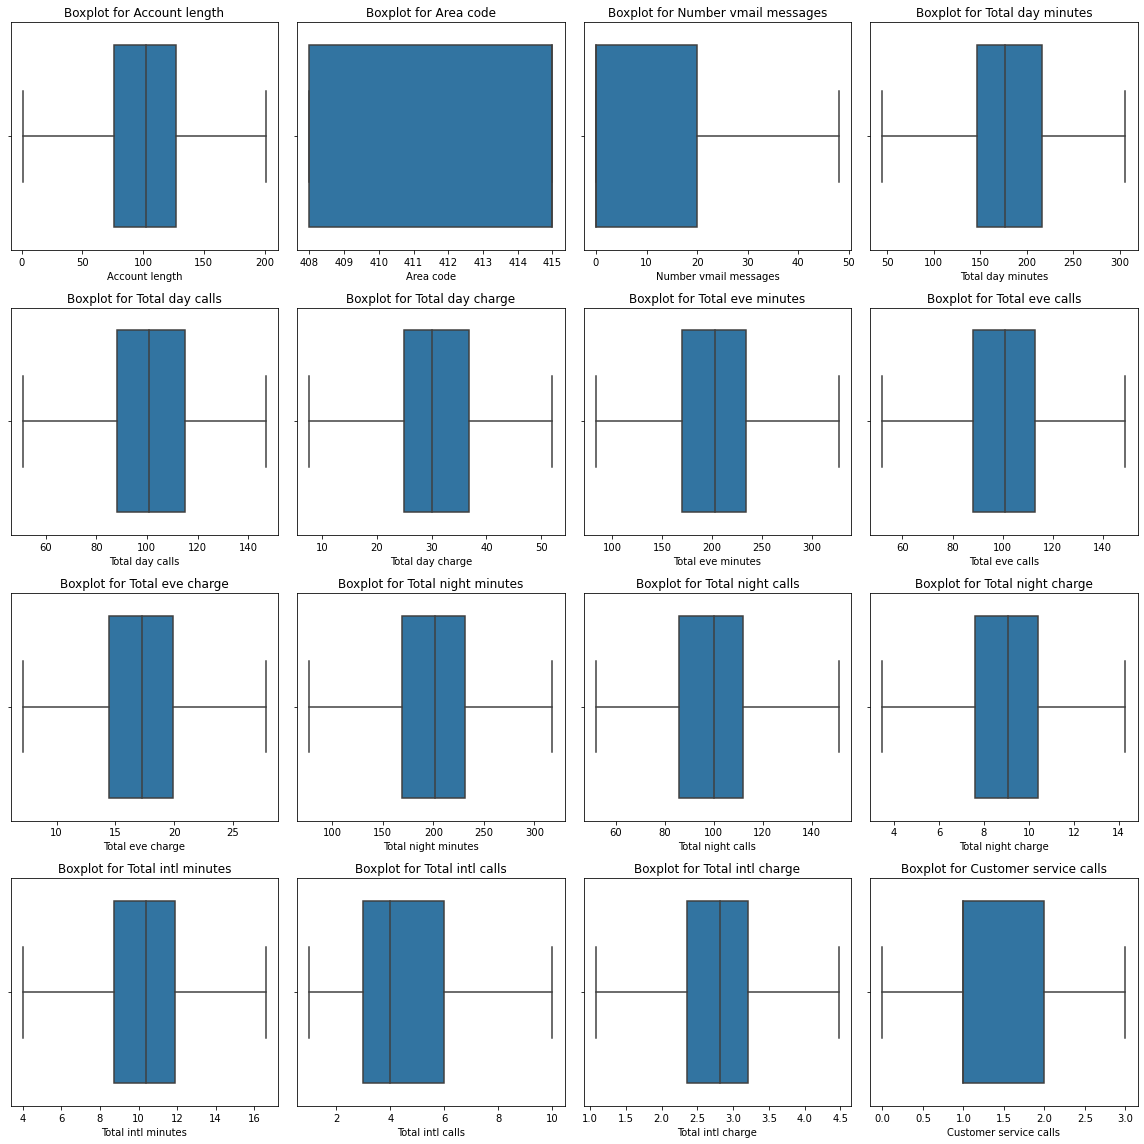

In [34]:
handle_outliers(test_dataset, replace_outliers_with_median_columns, replace_outliers_with_mean_columns)

In [35]:
# Iterate twice to change more outliers values
# Mean and median values don't change after the second iteration => Second iteration has no harm 
# Values that still considered as outliers after the itrations process are very large and may impact the mean/ median values
# so we drop their rows

## 3.2. Feature engineering

### 3.2.1. Encoding

In [36]:
def encoding_categorical_features(df, columns):
    '''
    Encodes ordinal categorical features
    
    df :                   Dataframe name
    columns :              Columns list
    label_encoder :        LabelEncoder instance
    '''
    label_encoder = LabelEncoder()
    for column in columns:
        # Encoding the categorical column
        df[column] = label_encoder.fit_transform(df[column])

In [37]:
# For these datasets the number of the categorical datasets is very low so we can just put them in a list and iterate through it
# instead of iterating the whole dataframe looking for features with category as dtype

In [38]:
categorical_columns = ['State', 'International plan', 'Voice mail plan', 'Churn']

# Encoding categoriacal features for each dataset
encoding_categorical_features(training_dataset, categorical_columns)
encoding_categorical_features(test_dataset, categorical_columns)

In [39]:
training_dataset.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,16,128.0,415,0,1,25,265.1,110.0,45.07,197.40000,99.0,16.780000,244.7,91.0,11.01,10.0,3.0,2.70,1.0,0
1,35,107.0,415,0,1,26,161.6,123.0,27.47,195.50000,103.0,16.620000,254.4,103.0,11.45,13.7,3.0,3.70,1.0,0
2,31,137.0,415,0,0,0,243.4,114.0,41.38,121.20000,110.0,10.300000,162.6,104.0,7.32,12.2,5.0,3.29,0.0,0
3,35,84.0,408,1,0,0,299.4,71.0,50.90,200.58322,88.0,17.049825,196.9,89.0,8.86,6.6,7.0,1.78,2.0,0
4,36,75.0,415,1,0,0,166.7,113.0,28.34,148.30000,122.0,12.610000,186.9,121.0,8.41,10.1,3.0,2.73,3.0,0


In [40]:
test_dataset.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,18,117.0,408,0,0,0,184.500000,97.0,31.370000,203.355322,80.0,17.285262,215.8,90.0,9.71,8.7,4.0,2.35,1.0,0
1,15,65.0,415,0,0,0,129.100000,137.0,21.950000,228.500000,83.0,19.420000,208.8,111.0,9.40,12.7,6.0,3.43,1.0,1
2,34,161.0,415,0,0,0,180.948126,67.0,30.761769,317.800000,97.0,27.010000,160.6,128.0,7.23,5.4,9.0,1.46,1.0,1
3,40,111.0,415,0,0,0,110.400000,103.0,18.770000,137.300000,102.0,11.670000,189.6,105.0,8.53,7.7,6.0,2.08,2.0,0
4,11,49.0,510,0,0,0,119.300000,117.0,20.280000,215.100000,109.0,18.280000,178.7,90.0,8.04,11.1,1.0,3.00,1.0,0


### Note : Our approch from this point on

In [41]:
# You can see that the data is splitted into two datasets 80% for training and 20% for testing.
# We thought... Wouldn't it be better (for the model accuracy) to concatenate both datasets into a single huge dataset
# and let the sklearn library do the model split using train_test_split() because the dataset as it is maybe arranged in a 
# way that the model can find a certain pattern that will lead him to overfitting (after all the train_test_split() algorithm 
# is coded in a way that it splits the data very randomly) ?

# To get an answer to this question we opted to work with both approaches starting the training phase with the data as it is and
# then mixing it and do the modeling phase once again.

# You maybe wondering:

# - Do we need to do all the data preparation all over again?
# - The short answer is no. The long answer is that the data is already clean and we will only handle duplicated rows
# (if they exist)

# - But this will take forever to train all the models and run the same code two times
# - Unfortunately, yes it will take twice the time but it's worth it. I mean..at least we will come up to a conclusion and
# learn something new.

In [42]:
# Making copies from the original datasets for the first approach (keeping the data as it is)
training_dataset1 = training_dataset.copy()
test_dataset1 = test_dataset.copy()

# Making copies from the original datasets for the second approach (merging the two datasets)
training_dataset2 = training_dataset.copy()
test_dataset2 = test_dataset.copy()

In [43]:
# Splitting the features from the tagrget
X1 = training_dataset1.drop(columns=['Churn'])  # All columns except target
y1 = training_dataset1['Churn']  # The target variable

X2 = test_dataset1.drop(columns=['Churn'])
y2 = test_dataset1['Churn']

### 3.2.2. Feature selection

In [44]:
def delete_correlated_features(df, threshold):
    '''
    Deletes features with corellation higher than the threshold
    
    df :                          Original dataframe name
    threshold :                   Correlation threshold
    correlation_matrix :          Df correlation matrix
    upper_triangle :              Upper triangle of the correlation matrix
    to_drop :                     Columns to drop
    '''
    correlation_matrix = df.corr()

    # Find the upper triangle of the correlation matrix (we only need to check one half)
    upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
    
    # Get a list of columns with correlations above the threshold
    to_drop = [column for column in upper_triangle.columns if any(abs(upper_triangle[column]) > threshold)]

    # Drop highly correlated features
    df = df.drop(columns=to_drop)
    
    return df

In [45]:
X1 = delete_correlated_features(X1, threshold=0.9)
print(f"X1 new shape: {X1.shape}")
X1.head()

X1 new shape: (2666, 14)


,State,Account length,Area code,International plan,Voice mail plan,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls
0,16,128.0,415,0,1,265.1,110.0,197.40000,99.0,244.7,91.0,10.0,3.0,1.0
1,35,107.0,415,0,1,161.6,123.0,195.50000,103.0,254.4,103.0,13.7,3.0,1.0
2,31,137.0,415,0,0,243.4,114.0,121.20000,110.0,162.6,104.0,12.2,5.0,0.0
3,35,84.0,408,1,0,299.4,71.0,200.58322,88.0,196.9,89.0,6.6,7.0,2.0
4,36,75.0,415,1,0,166.7,113.0,148.30000,122.0,186.9,121.0,10.1,3.0,3.0


In [46]:
X2 = delete_correlated_features(X2, threshold=0.9)
print(f"X2 new shape: {X2.shape}")
X2.head()

X2 new shape: (667, 14)


,State,Account length,Area code,International plan,Voice mail plan,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls
0,18,117.0,408,0,0,184.500000,97.0,203.355322,80.0,215.8,90.0,8.7,4.0,1.0
1,15,65.0,415,0,0,129.100000,137.0,228.500000,83.0,208.8,111.0,12.7,6.0,1.0
2,34,161.0,415,0,0,180.948126,67.0,317.800000,97.0,160.6,128.0,5.4,9.0,1.0
3,40,111.0,415,0,0,110.400000,103.0,137.300000,102.0,189.6,105.0,7.7,6.0,2.0
4,11,49.0,510,0,0,119.300000,117.0,215.100000,109.0,178.7,90.0,11.1,1.0,1.0


In [47]:
def select_best_features(X, y, nbr_features):
    '''
    Selects the best features for the modeling phase
    
    X :                        Features list
    y :                        Target
    nbr_features :             Number of features to select
    test :                
    fit :                      Feature selection fit model
    selected_features :        New features array
    '''
    test = SelectKBest(score_func=chi2, k=nbr_features)
    fit = test.fit(X, y)
    
    selected_features = X.columns[test.get_support()]
    
    X = fit.transform(X)
    
    return X, selected_features

In [48]:
# select_best_features() will be used after the models testing and evaluation of the importance of each feature for every model
# to ajust the nbr_features with appropriate value

In [49]:
# X1, selected_features = select_best_features(X1, y1, nbr_features=6)
# print(f"X1 new shape: {X1.shape}")
# print(f"Selected features: {list(selected_features)}")

### 3.2.2. Strandrization

In [50]:
scaler = StandardScaler()
X1 = scaler.fit_transform(X1)
X2 = scaler.transform(X2)

# 4. Modeling

## 4.1. Base

In [51]:
def evalution_base(X, y, y_pred):
    '''
    Evaluates model performance
    
    accuracy :        Model accuracy
    class_report:     Model classification report
    '''
    accuracy = accuracy_score(y, y_pred)
    class_report = classification_report(y, y_pred)
    
    print(f"Accuracy: {accuracy}")
    print(f"classification report:\n{class_report}")
    
    return accuracy, class_report

## 4.2. Logistic Regression

In [52]:
def logistic_regression_model(X, y, X_test, y_test):
    '''
    Predictis churn using Logistic regression model
    
    X :               Features array
    y :               Target
    lr_model :        Logistic regression model
    y_pred :          Predictions array
    '''
    
    lr_model = LogisticRegression(max_iter=1000)
    lr_model.fit(X, y)

    # Make predictions
    y_pred = lr_model.predict(X_test)
    
    # Evaluating
    accuracy, class_report = evalution_base(X_test, y_test, y_pred)
    
    print(f"Model Hyperparameters : {lr_model.get_params()}")
    
    return lr_model, y_pred, accuracy, class_report

In [53]:
lr_model, predictions, acc, report = logistic_regression_model(X1, y1, X2, y2)

Accuracy: 0.8515742128935532
classification report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       572
           1       0.36      0.05      0.09        95

    accuracy                           0.85       667
   macro avg       0.61      0.52      0.51       667
weighted avg       0.79      0.85      0.80       667

Model Hyperparameters : {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


## 4.2.1. Fine-tuning LR

In [54]:
def logistic_regression_with_optuna(X, y, X_test, y_test):
    """
    Fine-tunes a Logistic Regression model using Optuna for hyperparameter optimization.

    X : Features array
    y : Target array
    """
    # Set the logging level to suppress info and warnings
    logging.basicConfig(level=logging.ERROR)
    # Suppress Optuna's trial messages by setting its logging level
    optuna.logging.set_verbosity(optuna.logging.WARNING)

    def objective(trial):
        """
        Objective function for Optuna to optimize Logistic Regression hyperparameters.
        """
        # Suggest hyperparameters
        C = trial.suggest_float('C', 1e-4, 10, log=True)  # Log scale for C
        penalty = trial.suggest_categorical('penalty', ['l1', 'l2', 'elasticnet'])
        solver = trial.suggest_categorical('solver', ['liblinear', 'saga'])
        class_weight = trial.suggest_categorical('class_weight', [None, 'balanced'])

        # If penalty is elasticnet, enforce saga solver
        if penalty == 'elasticnet' and solver != 'saga':
            return float('inf')  # Invalid configuration, return a high value

        # If solver is liblinear, limit penalty to l1 or l2
        if solver == 'liblinear' and penalty == 'elasticnet':
            return float('inf')  # Invalid configuration, return a high value

        l1_ratio = None
        # ElasticNet requires both l1_ratio and saga solver
        if penalty == 'elasticnet' and solver == 'saga':
            l1_ratio = trial.suggest_float('l1_ratio', 0.0, 1.0)

        # Train the model
        try:
            model = LogisticRegression(
                C=C,
                penalty=penalty,
                solver=solver,
                l1_ratio=l1_ratio,
                class_weight=class_weight,
                max_iter=1000
            )
            model.fit(X, y)
            y_pred = model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
        except ValueError:
            # Handle invalid combinations (though we already prevent most in the logic)
            return float('inf')

        return -accuracy  # Maximize accuracy by minimizing its negative

    # Create and optimize the Optuna study
    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=50)

    # Retrieve the best hyperparameters
    best_params = study.best_params
    print("Best Hyperparameters:", best_params)

    # Train the final model using the best parameters
    best_model = LogisticRegression(
        C=best_params['C'],
        penalty=best_params['penalty'],
        solver=best_params['solver'],
        l1_ratio=best_params.get('l1_ratio', None),
        class_weight=best_params['class_weight'],
        max_iter=1000
    )
    best_model.fit(X, y)

    # Evaluate the final model
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, zero_division=1)
    print(f"Final Accuracy: {accuracy}")
    print(f"Classification Report:\n{class_report}")

    return best_model, y_pred, accuracy, class_report



In [55]:
lr_bestmodel, predictions, acc, report = logistic_regression_with_optuna(X1, y1, X2, y2)

Best Hyperparameters: {'C': 0.002679930759528523, 'penalty': 'l1', 'solver': 'saga', 'class_weight': None}
Final Accuracy: 0.8575712143928036
Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       572
           1       1.00      0.00      0.00        95

    accuracy                           0.86       667
   macro avg       0.93      0.50      0.46       667
weighted avg       0.88      0.86      0.79       667



## 4.3. KNN

## 4.3.1. KNN Base model

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

def knn_base_model(X, y, X_test, y_test):
    """
    Train and evaluate a base KNN model.
    
    X : Features for training.
    y : Target for training.
    X_test : Features for testing.
    y_test : Target for testing.
    
    Returns:
        model: Trained KNN model.
        y_pred: Predictions on test data.
        accuracy: Accuracy score of the model.
        class_report: Classification report.
    """
    # Initialize the KNN model with default parameters
    knn_model = KNeighborsClassifier()
    
    # Train the model
    knn_model.fit(X, y)
    
    # Make predictions on the test set
    y_pred = knn_model.predict(X_test)
    
    # Evaluate the model
    accuracy, class_report = evalution_base(X_test, y_test, y_pred)
    
    print(f"Model Hyperparameters: {knn_model.get_params()}")
    
    return knn_model, y_pred, accuracy, class_report

In [57]:
knn_model, knn_predictions, knn_acc, knn_report = knn_base_model(X1, y1, X2, y2)

Accuracy: 0.8785607196401799
classification report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       572
           1       0.72      0.24      0.36        95

    accuracy                           0.88       667
   macro avg       0.80      0.61      0.65       667
weighted avg       0.86      0.88      0.85       667

Model Hyperparameters: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


## 4.3.2. KNN hyperparameters Fine-tunned

In [58]:
import optuna
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import logging
import matplotlib.pyplot as plt


def knn_with_optuna(X, y, X_test, y_test):
    """
    Fine-tunes a KNN model using Optuna for hyperparameter optimization.

        X :               Features for training.
        y :               Target for training.
        X_test :          Features for testing.
        y_test :          Target for testing.
        best_model:       The trained KNN model with the best parameters.
        y_pred:           Predictions made by the best model on X_test.
        accuracy:         Accuracy score of the best model on the test set.
        class_report:     Classification report of the best model.
    """
    
    # Set the logging level to suppress info and warnings
    logging.basicConfig(level=logging.ERROR)
    optuna.logging.set_verbosity(optuna.logging.WARNING)

    def objective(trial):
        """
        Objective function for Optuna to optimize KNN hyperparameters.
        """
        # Suggest hyperparameters for KNN
        n_neighbors = trial.suggest_int('n_neighbors', 15, 20)
        weights = trial.suggest_categorical('weights', ['uniform', 'distance'])
        algorithm = trial.suggest_categorical('algorithm', ['auto', 'ball_tree', 'kd_tree'])
        leaf_size = trial.suggest_int('leaf_size', 10, 50)
        metric = trial.suggest_categorical('metric', ['euclidean', 'manhattan', 'minkowski', 'cosine', 'chebyshev'])
        n_jobs = trial.suggest_int('n_jobs', -1, 4)
        p = trial.suggest_int('p', 1, 2)  # Already set, but you can expand the range if needed
       


        try:
            # Instantiate and train the KNN model with suggested hyperparameters
            model = KNeighborsClassifier(
                n_neighbors=n_neighbors,
                weights=weights,
                algorithm=algorithm,
                leaf_size=leaf_size,
                metric=metric,
                p=p,
                n_jobs=n_jobs
            )
            model.fit(X, y)
            y_pred = model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
        except ValueError:
            # Handle invalid combinations
            return float('inf')

        return -accuracy  # Maximize accuracy by minimizing its negative

    # Create and optimize the Optuna study
    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=100)  # You can adjust the number of trials as needed

    # Retrieve the best hyperparameters
    best_params = study.best_params

    # Train the final model using the best parameters
    best_model = KNeighborsClassifier(
        n_neighbors=best_params['n_neighbors'],
        weights=best_params['weights'],
        algorithm=best_params['algorithm'],
        leaf_size=best_params['leaf_size'],
        metric=best_params['metric'],
        p=best_params['p'],
        n_jobs=-1
    )
    best_model.fit(X, y)
    y_pred = best_model.predict(X_test)
    y_prob = best_model.predict_proba(X_test)[:, 1]  # For AUC calculation, get the probability

    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

#         # Plot ROC curve
#     plt.figure(figsize=(8, 6))
#     plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
#     plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('Receiver Operating Characteristic (ROC)')
#     plt.legend(loc='lower right')
#     plt.show()

    

    # Evaluating
    accuracy, class_report = evalution_base(X_test, y_test, y_pred)
    
    print(f"Model Hyperparameters : {best_params}")
    print(f"AUC: {roc_auc:.4f}")
    

    return best_model, y_pred, accuracy, class_report, fpr, tpr, roc_auc

In [59]:
knn_best_model, y_pred, rf_acc, rf_report, fpr, tpr, roc_auc = knn_with_optuna(X1, y1, X2, y2)

Accuracy: 0.8800599700149925
classification report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       572
           1       0.86      0.19      0.31        95

    accuracy                           0.88       667
   macro avg       0.87      0.59      0.62       667
weighted avg       0.88      0.88      0.85       667

Model Hyperparameters : {'n_neighbors': 18, 'weights': 'distance', 'algorithm': 'auto', 'leaf_size': 22, 'metric': 'cosine', 'n_jobs': 4, 'p': 1}
AUC: 0.7663


## 4.4. SVM

In [60]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

def svm_tuned_model(X, y, X_test, y_test):
    """
    Train and evaluate a tuned SVM model using GridSearchCV.
    
        X :            Features for training.
        y :            Target for training.
        X_test :       Features for testing.
        y_test :       Target for testing.
        best_model:    Tuned SVM model with the best parameters.
        y_pred:        Predictions on test data.
        accuracy:      Accuracy score of the model.
        class_report:  Classification report.
    """
    # Define parameter grid for SVM
    param_grid = {'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto']}

    # Apply GridSearchCV to find the best parameters
    grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=10, verbose=1)
    grid_search.fit(X, y)

    # Retrieve the best model
    best_model = grid_search.best_estimator_
    print("Best parameters:", grid_search.best_params_)
    print("Best cross-validated score:", grid_search.best_score_)

    # Make predictions on the test set
    y_pred = best_model.predict(X_test)

    # Evaluate the model
    accuracy, class_report = evalution_base(X_test, y_test, y_pred)

    return best_model, y_pred, accuracy, class_report


In [61]:
svm_bestmodel, predictions, acc, report = svm_tuned_model(X1, y1, X2, y2)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
Best parameters: {'C': 10, 'gamma': 'auto'}
Best cross-validated score: 0.8919813578891048
Accuracy: 0.8830584707646177
classification report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       572
           1       0.63      0.42      0.51        95

    accuracy                           0.88       667
   macro avg       0.77      0.69      0.72       667
weighted avg       0.87      0.88      0.87       667




Score ROC-AUC: 0.7732


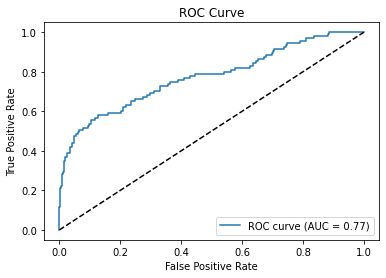

In [62]:
# Calculate ROC AUC using the decision_function of the trained model
y_prob = svm_bestmodel.decision_function(X2)  # Use decision_function on the trained model
roc_auc = roc_auc_score(y2, y_prob)
print(f"\nScore ROC-AUC: {roc_auc:.4f}")

# Plot ROC Curve
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y2, y_prob)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Random guess diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

## 4.5. Decision tree

## 4.5.1. Decision tree base model

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

def decision_tree_model(X, y, X_test, y_test):
    """
    Train a Decision Tree model on the provided data without splitting.

    X :               Features dataset.
    y :               Target labels.
    X_test :          Test dataset features.
    y_test :          Test dataset labels.
    model:            Trained Decision Tree model.
    y_pred :          Predictions array.
    accuracy:         Accuracy of the model on the test set.
    class_report:     Classification report of the model.
    """
    
    # Instantiate and train the Decision Tree model
    dt_model = DecisionTreeClassifier(random_state=42)
    dt_model.fit(X, y)
    
    # Predictions
    y_pred = dt_model.predict(X_test)
    
   # Evaluating
    accuracy, class_report = evalution_base(X_test, y_test, y_pred)
    
    # Print model hyperparameters
    print(f"Model Hyperparameters: {dt_model.get_params()}")
    
    return dt_model, y_pred, accuracy, class_report

In [64]:
dt_model, dt_predictions, dt_acc, dt_report = decision_tree_model(X1, y1, X2, y2)

Accuracy: 0.8455772113943029
classification report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       572
           1       0.46      0.55      0.50        95

    accuracy                           0.85       667
   macro avg       0.69      0.72      0.71       667
weighted avg       0.86      0.85      0.85       667

Model Hyperparameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}


## 4.5.2. Decision tree Hyperparameters fine-tuning

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import optuna
import logging

def decision_tree_with_partial_tuning(X, y, X_test, y_test):
    """
    Fine-tunes a Decision Tree model using Optuna for selected hyperparameters while keeping others fixed.

        X :               Features for training.
        y :               Target for training.
        X_test :          Features for testing.
        y_test :          Target for testing.
        best_model:       The trained Decision Tree model with the best parameters.
        y_pred:           Predictions made by the best model on X_test.
        accuracy:         Accuracy score of the best model on the test set.
        class_report:     Classification report of the best model.
    """
    # Fixed hyperparameters
    fixed_params = {
        'ccp_alpha': 0.0,
        'criterion': 'gini',
        'max_depth': None,
        'min_samples_split': 2,
        'min_samples_leaf': 1
    }

    # Set the logging level to suppress info and warnings
    logging.basicConfig(level=logging.ERROR)
    optuna.logging.set_verbosity(optuna.logging.WARNING)

    def objective(trial):
        """
        Objective function for Optuna to optimize additional Decision Tree hyperparameters.
        """
        # Suggest additional hyperparameters
        max_leaf_nodes = trial.suggest_int('max_leaf_nodes', 2, 100)
        min_impurity_decrease = trial.suggest_float('min_impurity_decrease', 0.0, 0.1, step=0.01)
        max_features = trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2', None])
        splitter = trial.suggest_categorical('splitter', ['best', 'random'])
        min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
        min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
        ccp_alpha = trial.suggest_float('ccp_alpha', 0.0, 0.1, step=0.01)
        class_weight = trial.suggest_categorical('class_weight', [None, 'balanced'])

        # Train and evaluate the model
        model = DecisionTreeClassifier(
            **fixed_params,
            max_leaf_nodes=max_leaf_nodes,
            min_impurity_decrease=min_impurity_decrease,
            max_features=max_features,
            splitter=splitter,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            ccp_alpha=ccp_alpha,
            class_weight=class_weight,
            random_state=42
        )
        model.fit(X, y)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        return -accuracy  # Maximize accuracy by minimizing its negative

    # Create and optimize the Optuna study
    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=50)

    # Retrieve the best additional hyperparameters
    best_params = study.best_params

    # Combine fixed and tuned hyperparameters
    all_params = {**fixed_params, **best_params}

    # Train the final model using the combined hyperparameters
    best_model = DecisionTreeClassifier(
        **all_params,
        random_state=42
    )
    best_model.fit(X, y)
    y_pred = best_model.predict(X_test)

    # Evaluate the final model
    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    print(f"Fixed Hyperparameters: {fixed_params}")
    print(f"Tuned Hyperparameters: {best_params}")
    print(f"Accuracy: {accuracy}")
    print(f"Classification Report:\n{class_report}")

    return best_model, y_pred, accuracy, class_report

In [66]:
dt_model, dt_predictions, dt_acc, dt_report = decision_tree_model(X1, y1, X2, y2)

Accuracy: 0.8455772113943029
classification report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       572
           1       0.46      0.55      0.50        95

    accuracy                           0.85       667
   macro avg       0.69      0.72      0.71       667
weighted avg       0.86      0.85      0.85       667

Model Hyperparameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}


## 4.6. Random forest

## 4.6.1. Random forest base model

In [67]:
def random_forest_model(X, y, X_test, y_test):
    '''
    Train a Random Forest model on the provided data without splitting.

    X :               Features dataset.
    y :               Target labels.
    model:            Forest model.
    y_pred :          Predictions array.
    '''
    
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X, y)
    y_pred = rf_model.predict(X_test)
    
    # Evaluating
    accuracy, class_report = evalution_base(X_test, y_test, y_pred)
    
    print(f"Model Hyperparameters : {rf_model.get_params()}")
    
    return rf_model, y_pred, accuracy, class_report

In [68]:
rf_model, rf_predictions, rf_acc, rf_report = random_forest_model(X1, y1, X2, y2)

Accuracy: 0.9085457271364318
classification report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       572
           1       0.90      0.40      0.55        95

    accuracy                           0.91       667
   macro avg       0.91      0.70      0.75       667
weighted avg       0.91      0.91      0.89       667

Model Hyperparameters : {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


## 4.6.2. Random forest hyperparameters tuning

In [69]:
def random_forest_with_optuna(X, y, X_test, y_test):
    """
    Fine-tunes a Random Forest model using Optuna for hyperparameter optimization.
    
        X :               Features for training.
        y :               Target for training.
        X_test :          Features for testing.
        y_test :          Target for testing.
        best_model:       The trained Random Forest model with the best parameters.
        y_pred:           Predictions made by the best model on X_test.
        accuracy:         Accuracy score of the best model on the test set.
        class_report:     Classification report of the best model.
    """
    
    # Set the logging level to suppress info and warnings
    logging.basicConfig(level=logging.ERROR)
    optuna.logging.set_verbosity(optuna.logging.WARNING)

    def objective(trial):
        """
        Objective function for Optuna to optimize Random Forest hyperparameters.
        """
        # Suggest hyperparameters
        n_estimators = trial.suggest_int('n_estimators', 14, 20)
        max_depth = trial.suggest_int('max_depth', 9, 20, log=True) 
        min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
        min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
        max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
        bootstrap = trial.suggest_categorical('bootstrap', [True, False])

        try:
            model = RandomForestClassifier(
                n_estimators=n_estimators,
                max_depth=max_depth,
                min_samples_split=min_samples_split,
                min_samples_leaf=min_samples_leaf,
                max_features=max_features,
                bootstrap=bootstrap,
                random_state=42,
                n_jobs=-1
            )
            model.fit(X, y)
            y_pred = model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
        except ValueError:
            # Handle invalid combinations
            return float('inf')

        return -accuracy  # Maximize accuracy by minimizing its negative

    # Create and optimize the Optuna study
    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=100) 

    # Retrieve the best hyperparameters
    best_params = study.best_params

    # Train the final model using the best parameters
    best_model = RandomForestClassifier(
        n_estimators=best_params['n_estimators'],
        max_depth=best_params['max_depth'],
        min_samples_split=best_params['min_samples_split'],
        min_samples_leaf=best_params['min_samples_leaf'],
        max_features=best_params['max_features'],
        random_state=42,
        n_jobs=-1
    )
    best_model.fit(X, y)
    y_pred = best_model.predict(X_test)
    
    # Evaluating
    accuracy, class_report = evalution_base(X_test, y_test, y_pred)
    
    print(f"Model Hyperparameters : {best_params}")

    return best_model, y_pred, accuracy, class_report

In [70]:
rf_bestmodel, rf_predictions, rf_acc, rf_report = random_forest_with_optuna(X1, y1, X2, y2)

Accuracy: 0.9295352323838081
classification report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       572
           1       0.96      0.53      0.68        95

    accuracy                           0.93       667
   macro avg       0.94      0.76      0.82       667
weighted avg       0.93      0.93      0.92       667

Model Hyperparameters : {'n_estimators': 20, 'max_depth': 10, 'min_samples_split': 16, 'min_samples_leaf': 5, 'max_features': None, 'bootstrap': True}


In [71]:
# Better model accuracy than the 3rd research paper while maintaining the same max_depth and the same n_estimators 
# The research paper accuracy is 0.80 ± 0.02

## 4.7. GBM

## 4.7.1. GBM Base model

In [73]:
def gbm_model(X, y, X_test, y_test):
    '''
    Train a Gradient Boosting Machine (GBM) model on the provided data without splitting.

    X :               Features dataset.
    y :               Target labels.
    X_test :          Features for testing.
    y_test :          Target labels for testing.
    gbm_model:        Trained GBM model.
    y_pred:           Predictions on test data.
    accuracy:         Accuracy score of the model.
    class_report:     Classification report.
    '''
    
    gbm_model = GradientBoostingClassifier(random_state=42)
    gbm_model.fit(X, y)
    y_pred = gbm_model.predict(X_test)
    
    accuracy, class_report = evalution_base(X_test, y_test, y_pred)
    
    print(f"Model Hyperparameters : {gbm_model.get_params()}")
    
    return gbm_model, y_pred, accuracy, class_report

In [74]:
gbm_model, gbm_predictions, gbm_acc, gbm_report = gbm_model(X1, y1, X2, y2)

Accuracy: 0.9190404797601199
classification report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       572
           1       0.92      0.47      0.62        95

    accuracy                           0.92       667
   macro avg       0.92      0.73      0.79       667
weighted avg       0.92      0.92      0.91       667

Model Hyperparameters : {'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 42, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


## 4.7.2. GBM hyperparameters fine-tunned

In [82]:
def gbm_with_optuna(X, y, X_test, y_test):
    """
    Fine-tunes a GBM model using Optuna for hyperparameter optimization.
    
        X :               Features for training.
        y :               Target for training.
        X_test :          Features for testing.
        y_test :          Target for testing.
        best_model:       The trained GBM model with the best parameters.
        y_pred:           Predictions made by the best model on X_test.
        accuracy:         Accuracy score of the best model on the test set.
        class_report:     Classification report of the best model.
    """
    
    # Set the logging level to suppress info and warnings
    logging.basicConfig(level=logging.ERROR)
    optuna.logging.set_verbosity(optuna.logging.WARNING)

    def objective(trial):
        """
        Objective function for Optuna to optimize GBM hyperparameters.
        """
        # Suggest hyperparameters
        n_estimators = trial.suggest_int('n_estimators', 50, 300)
        learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3, log=True)
        max_depth = trial.suggest_int('max_depth', 3, 20)
        min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
        min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
        subsample = trial.suggest_float('subsample', 0.5, 1.0)
        max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])

        try:
            model = GradientBoostingClassifier(
                n_estimators=n_estimators,
                learning_rate=learning_rate,
                max_depth=max_depth,
                min_samples_split=min_samples_split,
                min_samples_leaf=min_samples_leaf,
                subsample=subsample,
                max_features=max_features,
                random_state=42
            )
            model.fit(X, y)
            y_pred = model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
        except ValueError:
            # Handle invalid combinations
            return float('inf')

        return -accuracy  # Maximize accuracy by minimizing its negative

    # Create and optimize the Optuna study
    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=10)

    # Retrieve the best hyperparameters
    best_params = study.best_params

    # Train the final model using the best parameters
    best_model = GradientBoostingClassifier(
        n_estimators=best_params['n_estimators'],
        learning_rate=best_params['learning_rate'],
        max_depth=best_params['max_depth'],
        min_samples_split=best_params['min_samples_split'],
        min_samples_leaf=best_params['min_samples_leaf'],
        subsample=best_params['subsample'],
        max_features=best_params['max_features'],
        random_state=42
    )
    best_model.fit(X, y)
    y_pred = best_model.predict(X_test)
    
    # Evaluating
    accuracy, class_report = evalution_base(X_test, y_test, y_pred)
    
    print(f"Model Hyperparameters : {best_params}")

    return best_model, y_pred, accuracy, class_report

In [83]:
gbm_bestmodel, gbm_bestpredictions, gbm_bestacc, gbm_bestreport = gbm_with_optuna(X1, y1, X2, y2)

[W 2024-12-09 21:56:05,224] Trial 78 failed with parameters: {'n_estimators': 263, 'learning_rate': 0.02219814502890389, 'max_depth': 17, 'min_samples_split': 14, 'min_samples_leaf': 1, 'subsample': 0.8672261566417142, 'max_features': None} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "C:\Users\Mouheb\anaconda3\lib\site-packages\optuna\study\_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
  File "<ipython-input-82-fb35497d34cd>", line 43, in objective
    model.fit(X, y)
  File "C:\Users\Mouheb\anaconda3\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\Mouheb\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 532, in fit
    n_stages = self._fit_stages(
  File "C:\Users\Mouheb\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 610, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\Mouheb\anaconda3\lib

KeyboardInterrupt: 

## 4.8. XGBoost

In [152]:
warnings.filterwarnings("ignore", category=UserWarning, module="xgboost")

## 4.8.1. XGBoost base model

In [89]:
def xgboost_model(X, y, X_test, y_test):
    '''
    Train an XGBoost model on the provided data without splitting.

    X :               Features dataset.
    y :               Target labels.
    X_test :          Features for testing.
    y_test :          Target labels for testing.
    xgb_model:        Trained XGBoost model.
    y_pred:           Predictions on test data.
    accuracy:         Accuracy score of the model.
    class_report:     Classification report.
    '''
    
    # Initialize the XGBoost classifier with default parameters
    xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')
    xgb_model.fit(X, y)
    y_pred = xgb_model.predict(X_test)
    
    # Evaluate the model
    accuracy, class_report = evalution_base(X_test, y_test, y_pred)
    
    print(f"Model Hyperparameters : {xgb_model.get_params()}")
    
    return xgb_model, y_pred, accuracy, class_report

In [90]:
xgbm_model, xgbm_predictions, xgbm_acc, xgbm_report = xgboost_model(X1, y1, X2, y2)

Accuracy: 0.9115442278860569
classification report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       572
           1       0.81      0.49      0.61        95

    accuracy                           0.91       667
   macro avg       0.87      0.74      0.78       667
weighted avg       0.91      0.91      0.90       667

Model Hyperparameters : {'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': 'logloss', 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_c

## 4.8.2. XGBoost hyperparameters fine-tuned

In [120]:
import logging
import optuna
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

def xgboost_with_optuna(X, y, X_test, y_test):
    """
    Fine-tunes an XGBoost model using Optuna for hyperparameter optimization.
    
    X :               Features for training.
    y :               Target for training.
    X_test :          Features for testing.
    y_test :          Target for testing.
    best_model:       The trained XGBoost model with the best parameters.
    y_pred:           Predictions made by the best model on X_test.
    accuracy:         Accuracy score of the best model on the test set.
    class_report:     Classification report of the best model.
    """
    
    # Set the logging level to suppress info and warnings
    logging.basicConfig(level=logging.ERROR)
    optuna.logging.set_verbosity(optuna.logging.WARNING)

    def objective(trial):
        """
        Objective function for Optuna to optimize XGBoost hyperparameters.
        """
        # Suggest hyperparameters
        learning_rate = trial.suggest_float('learning_rate', 0.01, 0.2, log=True)
        max_depth = trial.suggest_int('max_depth', 4, 12)
        min_child_weight = trial.suggest_int('min_child_weight', 1, 10)
        subsample = trial.suggest_float('subsample', 0.6, 1.0)
        colsample_bytree = trial.suggest_float('colsample_bytree', 0.6, 1.0)
        gamma = trial.suggest_float('gamma', 0.0, 5.0)
        scale_pos_weight = trial.suggest_float('scale_pos_weight', 1.0, 5.0)
        reg_alpha = trial.suggest_float('reg_alpha', 0.0, 1.0)
        reg_lambda = trial.suggest_float('reg_lambda', 0.0, 1.0)
        max_delta_step = trial.suggest_int('max_delta_step', 0, 10)
        tree_method = trial.suggest_categorical('tree_method', ['auto', 'hist', 'gpu_hist'])
        grow_policy = trial.suggest_categorical('grow_policy', ['depthwise', 'lossguide'])

        try:
            model = XGBClassifier(
                learning_rate=learning_rate,
                max_depth=max_depth,
                min_child_weight=min_child_weight,
                subsample=subsample,
                colsample_bytree=colsample_bytree,
                gamma=gamma,
                scale_pos_weight=scale_pos_weight,
                reg_alpha=reg_alpha,
                reg_lambda=reg_lambda,
                max_delta_step=max_delta_step,
                tree_method=tree_method,
                grow_policy=grow_policy,
                random_state=42
            )
            
            # Fit model without eval_metric
            model.fit(
                X, y,
                eval_set=[(X_test, y_test)],
                verbose=False
            )
            
            # Predict and evaluate
            y_pred = model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
        except ValueError:
            # Handle invalid combinations
            return float('inf')

        return -accuracy  # Maximize accuracy by minimizing its negative

    # Create and optimize the Optuna study
    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=100)  # Increase trials for better exploration

    # Retrieve the best hyperparameters
    best_params = study.best_params

    # Train the final model using the best parameters
    best_model = XGBClassifier(
        learning_rate=best_params['learning_rate'],
        max_depth=best_params['max_depth'],
        min_child_weight=best_params['min_child_weight'],
        subsample=best_params['subsample'],
        colsample_bytree=best_params['colsample_bytree'],
        gamma=best_params['gamma'],
        scale_pos_weight=best_params['scale_pos_weight'],
        reg_alpha=best_params['reg_alpha'],
        reg_lambda=best_params['reg_lambda'],
        max_delta_step=best_params['max_delta_step'],
        tree_method=best_params['tree_method'],
        grow_policy=best_params['grow_policy'],
        random_state=42
    )
    
    # Final model fitting (no early stopping)
    best_model.fit(
        X, y,
        eval_set=[(X_test, y_test)],
        verbose=False
    )
    
    # Make predictions
    y_pred = best_model.predict(X_test)
    
    # Evaluating performance
    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    print(f"Model Hyperparameters : {best_params}")
    print(f"Accuracy: {accuracy}")
    print(f"Classification Report:\n{class_report}")

    return best_model, y_pred, accuracy, class_report


In [123]:
xgbm_bestmodel, xgbm_bestpredictions, xgbm_bestacc, xgbm_bestreport = xgboost_with_optuna(X1, y1, X2, y2)

Model Hyperparameters : {'learning_rate': 0.051552558454962386, 'max_depth': 4, 'min_child_weight': 1, 'subsample': 0.6849589032397984, 'colsample_bytree': 0.8213270843313099, 'gamma': 2.492689594347483, 'scale_pos_weight': 2.1392113090278246, 'reg_alpha': 0.7180435993718235, 'reg_lambda': 0.4685950512091471, 'max_delta_step': 3, 'tree_method': 'auto', 'grow_policy': 'depthwise'}
Accuracy: 0.9295352323838081
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       572
           1       0.90      0.57      0.70        95

    accuracy                           0.93       667
   macro avg       0.92      0.78      0.83       667
weighted avg       0.93      0.93      0.92       667



## 4.9. LightGBM

## 4.9.1. LightGBM base model

In [153]:
def lightgbm_model(X, y, X_test, y_test):
    '''
    Train a LightGBM model on the provided data without splitting.

    X :               Features dataset.
    y :               Target labels.
    X_test :          Features for testing.
    y_test :          Target labels for testing.
    lgb_model:        Trained LightGBM model.
    y_pred:           Predictions on test data.
    accuracy:         Accuracy score of the model.
    class_report:     Classification report.
    '''
    
    # Initialize the LightGBM classifier with default parameters
    lgb_model = lgb.LGBMClassifier(random_state=42)
    lgb_model.fit(X, y)
    y_pred = lgb_model.predict(X_test)
    
    # Evaluate the model
    accuracy, class_report = evalution_base(X_test, y_test, y_pred)
    
    print(f"Model Hyperparameters : {lgb_model.get_params()}")
    
    return lgb_model, y_pred, accuracy, class_report

In [154]:
lightgbm_model, lightgbm_predictions, lightgbm_acc, lightgbm_report = lightgbm_model(X1, y1, X2, y2)

[LightGBM] [Info] Number of positive: 388, number of negative: 2278
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001328 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1460
[LightGBM] [Info] Number of data points in the train set: 2666, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.145536 -> initscore=-1.770048
[LightGBM] [Info] Start training from score -1.770048
Accuracy: 0.9145427286356822
classification report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       572
           1       0.84      0.49      0.62        95

    accuracy                           0.91       667
   macro avg       0.88      0.74      0.79       667
weighted avg       0.91      0.91      0.90       667

Model Hyperparameters : {'boosting_type': 'gbdt', 'class_weight': N

## 4.9.2. LightGBM with hyperparameters fine-tuning

In [163]:
import logging
import optuna
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report

def lightgbm_with_optuna(X, y, X_test, y_test):
    """
    Fine-tunes a LightGBM model using Optuna for hyperparameter optimization.
    
    X :               Features for training.
    y :               Target for training.
    X_test :          Features for testing.
    y_test :          Target for testing.
    best_model:       The trained LightGBM model with the best parameters.
    y_pred:           Predictions made by the best model on X_test.
    accuracy:         Accuracy score of the best model on the test set.
    class_report:     Classification report of the best model.
    """
    
    # Set the logging level to suppress info and warnings
    logging.basicConfig(level=logging.ERROR)
    optuna.logging.set_verbosity(optuna.logging.WARNING)

    def objective(trial):
        """
        Objective function for Optuna to optimize LightGBM hyperparameters.
        """
        # Suggest hyperparameters for LightGBM
        learning_rate = trial.suggest_float('learning_rate', 0.01, 0.2, log=True)
        max_depth = trial.suggest_int('max_depth', 4, 12)
        num_leaves = trial.suggest_int('num_leaves', 31, 100)
        min_child_samples = trial.suggest_int('min_child_samples', 5, 100)
        subsample = trial.suggest_float('subsample', 0.6, 1.0)
        colsample_bytree = trial.suggest_float('colsample_bytree', 0.6, 1.0)
        reg_alpha = trial.suggest_float('reg_alpha', 0.0, 1.0)
        reg_lambda = trial.suggest_float('reg_lambda', 0.0, 1.0)
        scale_pos_weight = trial.suggest_float('scale_pos_weight', 1.0, 5.0)

        try:
            model = lgb.LGBMClassifier(
                learning_rate=learning_rate,
                max_depth=max_depth,
                num_leaves=num_leaves,
                min_child_samples=min_child_samples,
                subsample=subsample,
                colsample_bytree=colsample_bytree,
                reg_alpha=reg_alpha,
                reg_lambda=reg_lambda,
                scale_pos_weight=scale_pos_weight,
                random_state=42,
                silent=True  # Suppress output during training
            )
            
            # Fit model without eval_metric and verbose
            model.fit(
                X, y,
                eval_set=[(X_test, y_test)],
                verbose=False  # Remove the verbose argument as it's not supported directly
            )
            
            # Predict and evaluate
            y_pred = model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
        except ValueError:
            # Handle invalid combinations
            return float('inf')

        return -accuracy  # Maximize accuracy by minimizing its negative

    # Create and optimize the Optuna study
    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=100)  # Increase trials for better exploration

    # Retrieve the best hyperparameters
    best_params = study.best_params

    # Train the final model using the best parameters
    best_model = lgb.LGBMClassifier(
        learning_rate=best_params['learning_rate'],
        max_depth=best_params['max_depth'],
        num_leaves=best_params['num_leaves'],
        min_child_samples=best_params['min_child_samples'],
        subsample=best_params['subsample'],
        colsample_bytree=best_params['colsample_bytree'],
        reg_alpha=best_params['reg_alpha'],
        reg_lambda=best_params['reg_lambda'],
        scale_pos_weight=best_params['scale_pos_weight'],
        random_state=42,
        silent=True  # Suppress output during training
    )
    
    # Final model fitting (no early stopping)
    best_model.fit(
        X, y,
        eval_set=[(X_test, y_test)],
        verbose=False  # Suppress output
    )
    
    # Make predictions
    y_pred = best_model.predict(X_test)
    
    # Evaluating performance
    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    print(f"Model Hyperparameters : {best_params}")
    print(f"Accuracy: {accuracy}")
    print(f"Classification Report:\n{class_report}")

    return best_model, y_pred, accuracy, class_report


In [164]:
lightgbm_bestmodel, lightgbm_bestpredictions, lightgbm_bestacc, lightgbm_bestreport = lightgbm_with_optuna(X1, y1, X2, y2)

[W 2024-12-09 22:54:01,492] Trial 0 failed with parameters: {'learning_rate': 0.022046678113331063, 'max_depth': 12, 'num_leaves': 31, 'min_child_samples': 19, 'subsample': 0.9493014141281274, 'colsample_bytree': 0.6217144222669885, 'reg_alpha': 0.050621501401466706, 'reg_lambda': 0.1277488642072464, 'scale_pos_weight': 4.646879097532684} because of the following error: TypeError("fit() got an unexpected keyword argument 'verbose'").
Traceback (most recent call last):
  File "C:\Users\Mouheb\anaconda3\lib\site-packages\optuna\study\_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
  File "<ipython-input-163-46ad8c3f421f>", line 55, in objective
    model.fit(
TypeError: fit() got an unexpected keyword argument 'verbose'
[W 2024-12-09 22:54:01,493] Trial 0 failed with value None.


TypeError: fit() got an unexpected keyword argument 'verbose'